# kNN
- k 近邻算法
- 结果由离它最近的 k 个样本比例来决定

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [6]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [7]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [8]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

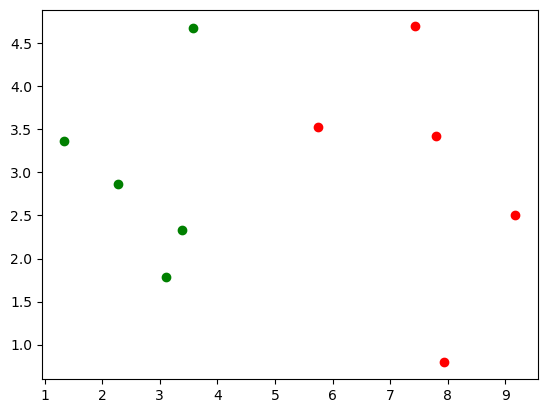

In [9]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

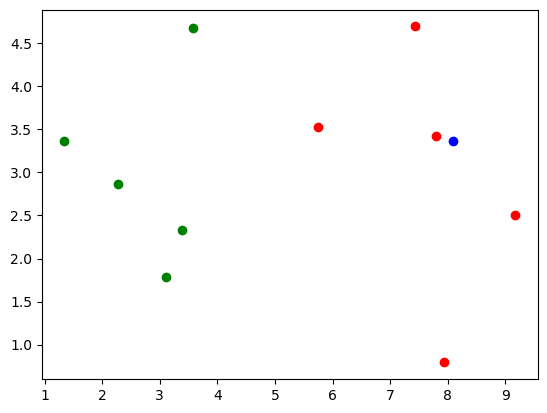

In [10]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
# 新数据
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程

In [11]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2)) # x 与 X 两点距离
    distances.append(d)

In [12]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [13]:
# 列表推导
distances = [sqrt(np.sum((x_train - x)**2))
             for x_train in X_train]

In [14]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [15]:
# 排序结果索引
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [16]:
nearest = np.argsort(distances)
k = 6
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

In [17]:
# 离 x 最近的 y
topK_y

[1, 1, 1, 1, 1, 0]

In [18]:
from collections import Counter
votes = Counter(topK_y)

In [19]:
votes

Counter({1: 5, 0: 1})

In [20]:
# 票数最多的 1 个元素
votes.most_common(1)
predict_y = votes.most_common(1)[0][0]

In [21]:
# x 的类别为 1
predict_y

1

## scikit-learn 中的 kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
# 拟合
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [24]:
# 转化成二维数组
X_predict = x.reshape(1, -1)
X_predict

array([[8.09360732, 3.36573151]])

In [27]:
y_predict = kNN_classifier.predict(X_predict)
y_predict[0]

C:\Users\library\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1

## 测试算法
- 通过测试数据判断模型好坏

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

In [30]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
X = iris.data
y = iris.target

In [32]:
X.shape

(150, 4)

In [33]:
y.shape

(150,)

## train_test_split 过程

In [39]:
# 乱序索引
shuffled_indexes = np.random.permutation(len(X))
# shuffled_indexes

In [35]:
# 划分测试集 训练集
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [36]:
test_indexes = shuffled_indexes[:test_size]
train_indexes = shuffled_indexes[test_size:]

In [37]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## 测试得分过程

In [ ]:
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [ ]:
y_predict

In [ ]:
y_test

In [ ]:
sum(y_predict == y_test)

In [ ]:
sum(y_predict == y_test) / len(y_test)

## sklearn中的train_test_split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## 分类准确度

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [42]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [43]:
X = digits.data
X.shape

(1797, 64)

In [44]:
y = digits.target
y.shape

(1797,)

In [45]:
# 666 行对应数据为 0
some_digit = X[666]
some_digit_image = some_digit.reshape(8, 8)

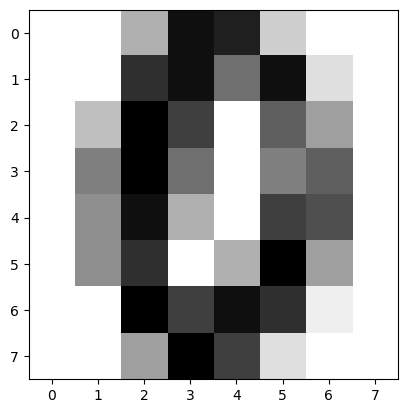

In [46]:
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

In [ ]:
# 自己的 knn 进行得分预测
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)
from playML.kNN import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

sum(y_predict == y_test) / len(y_test)

## scikit-learn 中的 accuracy_score

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_predict = knn_clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

C:\Users\library\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9916666666666667

In [48]:
knn_clf.score(X_test, y_test)

C:\Users\library\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9916666666666667

## 超参数

In [49]:
import numpy as np
from sklearn import datasets

In [50]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)

0.9916666666666667

In [53]:
import warnings
warnings.filterwarnings("ignore")

## 寻找最好的 k
- k 在边界上要继续扩大范围

In [55]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("best_k =", best_k)
print("best_score =", best_score)

best_k = 3
best_score = 0.9916666666666667


## 考虑距离？不考虑距离？

In [56]:
best_score = 0.0
best_k = -1
best_method = ""
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
        
print("best_method =", best_method)
print("best_k =", best_k)
print("best_score =", best_score)

best_method = uniform
best_k = 3
best_score = 0.9916666666666667


## 搜索明可夫斯基距离相应的p

In [57]:
best_score = 0.0
best_k = -1
best_p = -1

for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_p = p
            best_score = score
        
print("best_k =", best_k)
print("best_p =", best_p)
print("best_score =", best_score)

best_k = 3
best_p = 2
best_score = 0.9916666666666667


## 网格搜索和更多kNN中的超参数

In [58]:
import numpy as np
from sklearn import datasets

In [59]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

sk_knn_clf = KNeighborsClassifier(n_neighbors=4, weights="uniform")
sk_knn_clf.fit(X_train, y_train)
sk_knn_clf.score(X_test, y_test)

0.9916666666666667

In [70]:
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

In [71]:
knn_clf = KNeighborsClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [73]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 1s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [77]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [76]:
grid_search.best_score_

0.9860820751064653

In [74]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [79]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Wall time: 8.63 s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)